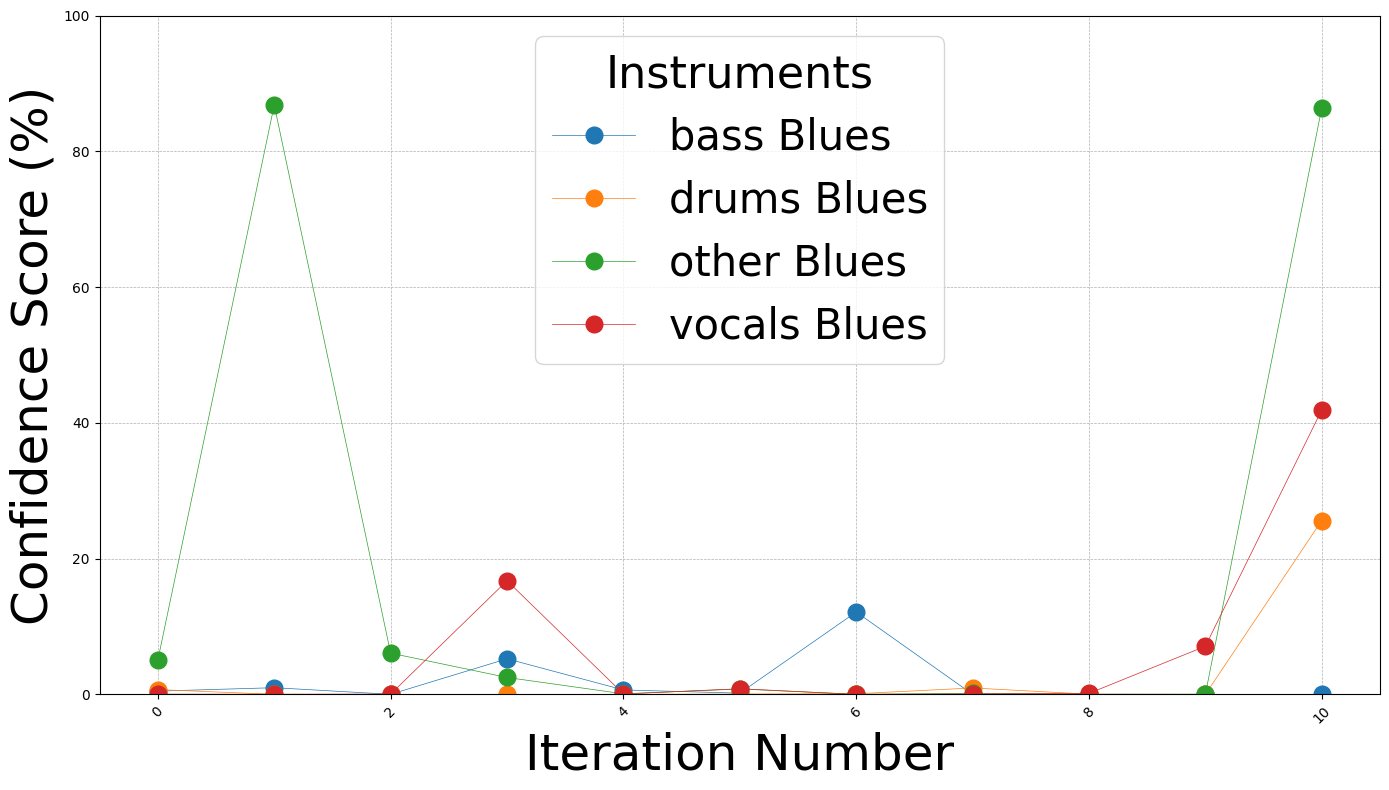

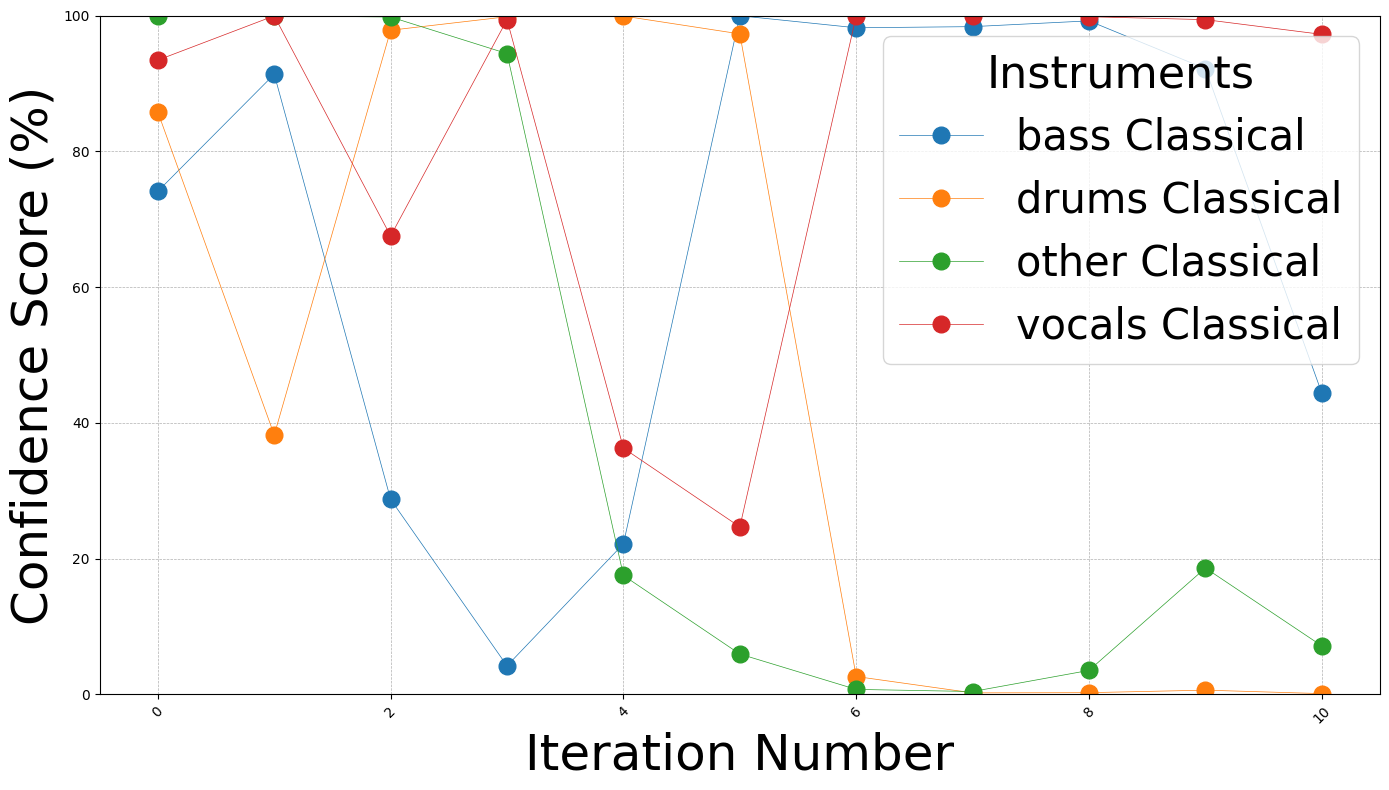

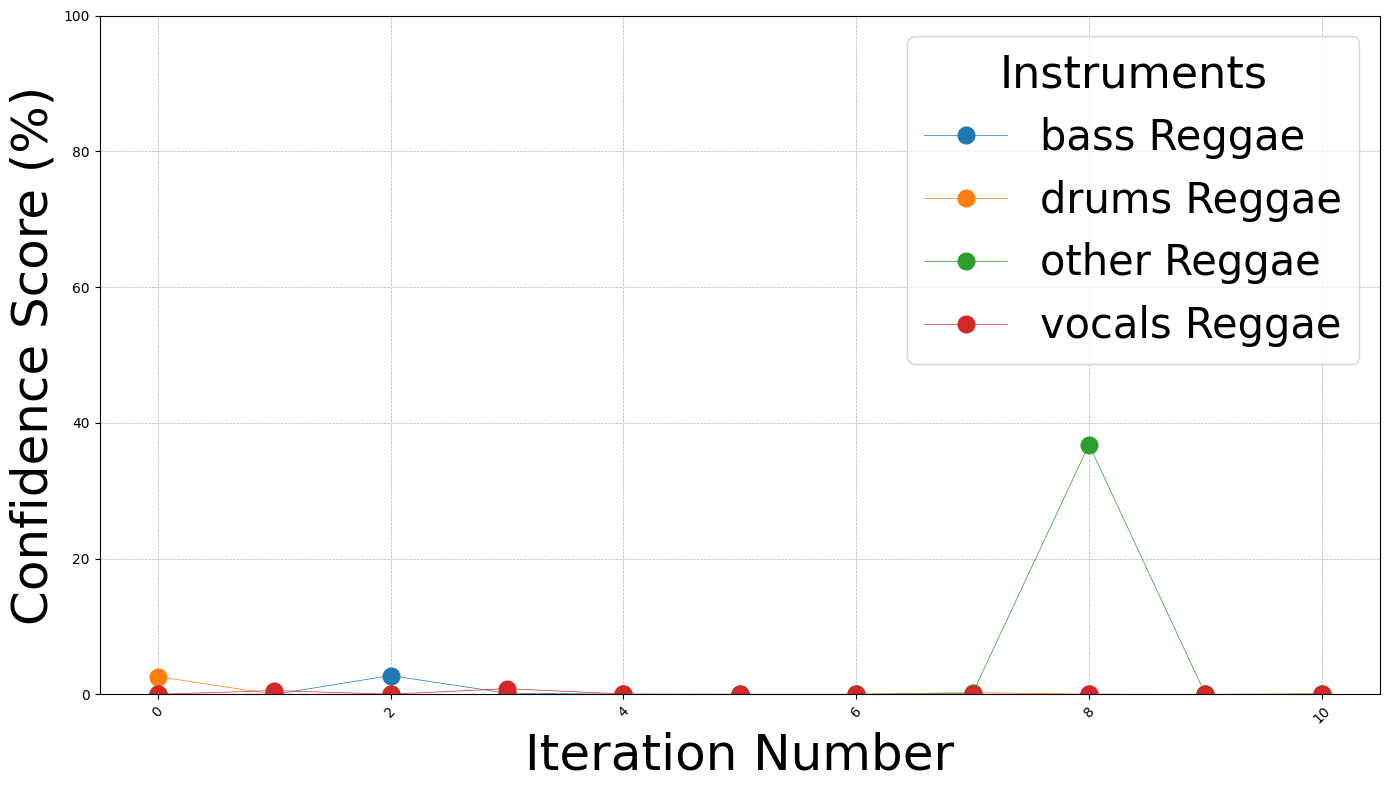

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns


def clean_and_load_csv(file_path):
    df = pd.read_csv(file_path)
    return df

file_paths = ["prompts1.csv", "prompts2.csv", "prompts3.csv"]
dataframes = [clean_and_load_csv(file_path) for file_path in file_paths]

def extract_instrument_data(df, column_name):
    instruments = ['bass', 'drums', 'other', 'vocals']
    instrument_data = {instrument: [] for instrument in instruments}
    
    for index, row in df.iterrows():
        for instrument in instruments:
            if re.match(f"{instrument}_\d+", row['Iteration']):
                instrument_data[instrument].append((int(row['Iteration'].split('_')[1]), float(row[column_name].strip('%'))))
    
    return instrument_data

def plot_iterations(df, column_name, title):
    plt.figure(figsize=(14, 8))
    instrument_data = extract_instrument_data(df, column_name)
    
    for instrument, data in instrument_data.items():
        data = sorted(data)
        if data:
            iterations, values = zip(*data)
            plt.plot(iterations, values, marker='o', label=f'{instrument} {title}', linewidth=0.5, markersize=12) 
    
    plt.xlabel('Iteration Number', fontsize=36)
    plt.ylabel('Confidence Score (%)', fontsize=36)
    plt.legend(title='Instruments', fontsize=30, title_fontsize=32)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig(f'{title}_confidence_over_iterations.png', dpi=300)
    plt.show()

titles = ['Blues', 'Classical', 'Reggae']
column_names = ['blues Confidence', 'classical Confidence', 'reggae Confidence']

for df, column_name, title in zip(dataframes, column_names, titles):
    plot_iterations(df, column_name, title)


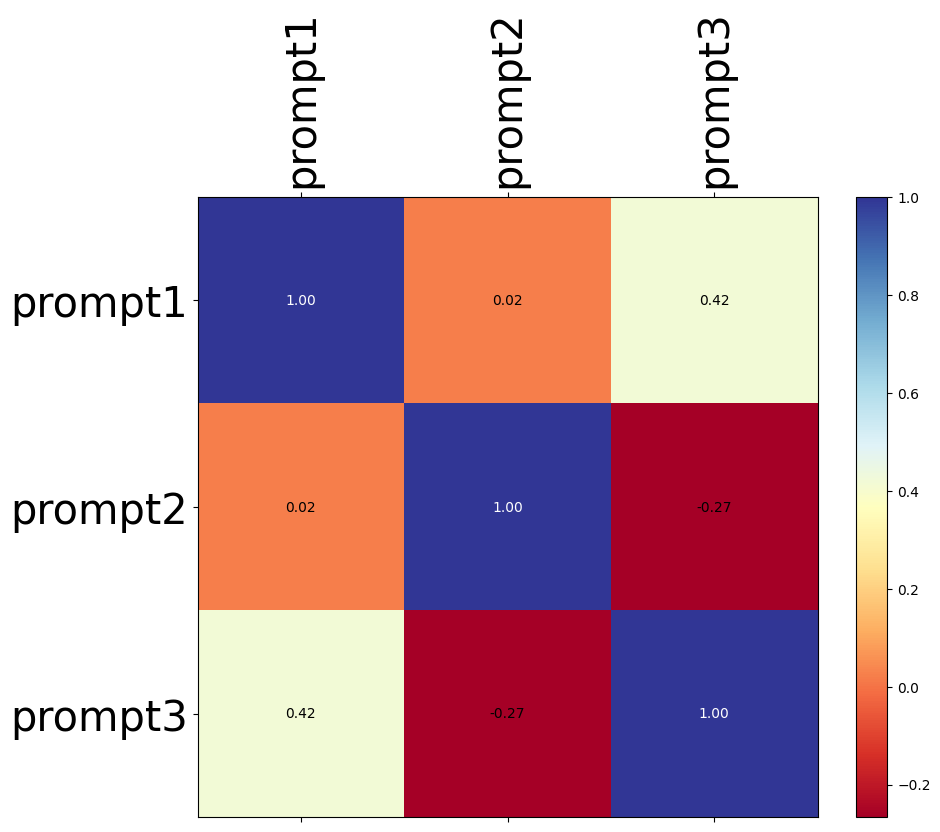

In [50]:
# Load the cleaned CSV files
def load_csv(file_path):
    return pd.read_csv(file_path)

dataframes = [load_csv(file_path) for file_path in file_paths]

# Extract the Iterative Consistency Check column and set the iteration names as the index
data = {
    'prompt1': dataframes[0].set_index('Iteration')['Iterative Consistency Check'],
    'prompt2': dataframes[1].set_index('Iteration')['Iterative Consistency Check'],
    'prompt3': dataframes[2].set_index('Iteration')['Iterative Consistency Check']
}

# Combine the data into a single DataFrame
df = pd.DataFrame(data)

# Convert the Iterative Consistency Check values to numeric (if necessary)
df = df.apply(pd.to_numeric, errors='coerce')

# Output the data series
#print("Data Series:")
#print(df)

# Calculate the Pearson correlation coefficient
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='Blues', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=30)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index, fontsize=30)

for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=10)

#plt.title('Correlation Matrix', pad=20, fontsize=16)
plt.show()

